In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_excel('timeseries.xls')
df.fillna(0, inplace=True)

df.index=pd.to_datetime(df.Date)
df.head()

,Date,Balance,funds rec,fund remittances,cred,deb
Date,,,,,,
2018-06-01,2018-06-01,162348.74,0,0,5,50
2018-06-02,2018-06-02,162331.04,0,0,5,50
2018-06-03,2018-06-03,162331.04,0,0,5,50
2018-06-04,2018-06-04,96452.04,0,0,5,50
2018-06-05,2018-06-05,396452.04,0,0,5,50


In [4]:
df.describe()

,Balance,funds rec,fund remittances,cred,deb
count,3.650000e+02,365.000000,365.000000,365.000000,365.000000
mean,2.751365e+05,0.068493,0.106849,4.082192,40.975342
std,3.659505e+05,0.252937,0.309346,2.863916,24.378245
min,5.404280e+03,0.000000,0.000000,1.000000,11.000000
25%,3.069758e+04,0.000000,0.000000,2.000000,17.000000
50%,1.237940e+05,0.000000,0.000000,3.000000,48.000000
75%,3.964520e+05,0.000000,0.000000,5.000000,61.000000
max,3.211559e+06,1.000000,1.000000,12.000000,81.000000


In [5]:
update1=df["funds rec"].std(axis=0)
update2=df["fund remittances"].std(axis=0)
update3=df["cred"].std(axis=0)
update4=df["deb"].std(axis=0)

In [6]:
from datetime import date
d0 = date(2019, 5, 31)
d1 = date(2019, 7, 1)
delta = d1 - d0
a=delta.days

In [7]:
y=range(a)

In [8]:
from xlutils.copy import copy    
from xlrd import open_workbook

In [9]:
book2 = open_workbook('timeseries.xls')  
book = copy(book2)  
sheet = book.get_sheet(0)

row=366

content = [update1,update2,update3,update4]
for x in y:
    column=2
    for item in content:
        sheet.write(row, column, item)
        column+=1
    row+=1    
    

    
    
book.save("timeseries1.xls")

In [10]:
#manual update date 

In [13]:
df2=pd.read_excel('timeseries1.xls')

In [14]:
df2.head()

,Date,Balance,funds rec,fund remittances,cred,deb
0,2018-06-01,162348.74,0.0,0.0,5.0,50.0
1,2018-06-02,162331.04,0.0,0.0,5.0,50.0
2,2018-06-03,162331.04,0.0,0.0,5.0,50.0
3,2018-06-04,96452.04,0.0,0.0,5.0,50.0
4,2018-06-05,396452.04,0.0,0.0,5.0,50.0


In [15]:
#df2["Date"] = pd.to_datetime(df2["Date"]).dt.strftime('%d-%m-%Y')

In [16]:
test=df2[321:366]

In [17]:
df2.index=pd.to_datetime(df2.Date)
df=df2

In [18]:
df=df.drop(columns='Date')

In [19]:
df.tail()

,Balance,funds rec,fund remittances,cred,deb
Date,,,,,
2019-06-27,NaN,0.252937,0.309346,2.863916,24.378245
2019-06-28,NaN,0.252937,0.309346,2.863916,24.378245
2019-06-29,NaN,0.252937,0.309346,2.863916,24.378245
2019-06-30,NaN,0.252937,0.309346,2.863916,24.378245
2019-07-01,NaN,0.252937,0.309346,2.863916,24.378245


In [20]:
df.info()
train=df[:321]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 396 entries, 2018-06-01 to 2019-07-01
Data columns (total 5 columns):
Balance             365 non-null float64
funds rec           396 non-null float64
fund remittances    396 non-null float64
cred                396 non-null float64
deb                 396 non-null float64
dtypes: float64(5)
memory usage: 18.6 KB


In [21]:
df.plot(grid=True)

In [22]:
df2=df[:366].resample(rule='W').last()

In [23]:
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf

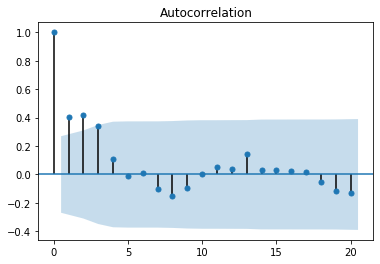

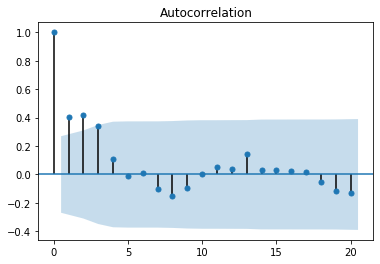

In [24]:
plot_acf(x=df2['Balance'],lags=20,alpha=0.05)

In [25]:
import matplotlib.pyplot as plt

In [26]:
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=5,
                              start_d=1,                              
                              start_q=0,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel

In [27]:
import pmdarima as pm

In [28]:
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, 
                                    return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1], 
                           periods=n_periods, freq="W")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel(timeseries.name)
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", 
                     alpha=0.25)
    plt.legend(("past", "forecast", "95% confidence interval"),  
               loc="upper left")
    plt.show()

Fit ARIMA: order=(5, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=8862.684, BIC=8889.084, Fit time=0.291 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=9146.503, BIC=9154.046, Fit time=0.029 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=8860.351, BIC=8871.665, Fit time=0.054 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=8984.516, BIC=8995.830, Fit time=0.092 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=9264.759, BIC=9268.530, Fit time=0.020 seconds
Fit ARIMA: order=(2, 0, 0) seasonal_order=(0, 0, 0, 0); AIC=8862.310, BIC=8877.396, Fit time=0.151 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=8862.307, BIC=8877.393, Fit time=0.148 seconds


C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 0); AIC=8864.065, BIC=8882.923, Fit time=0.570 seconds
Total fit time: 1.372 seconds


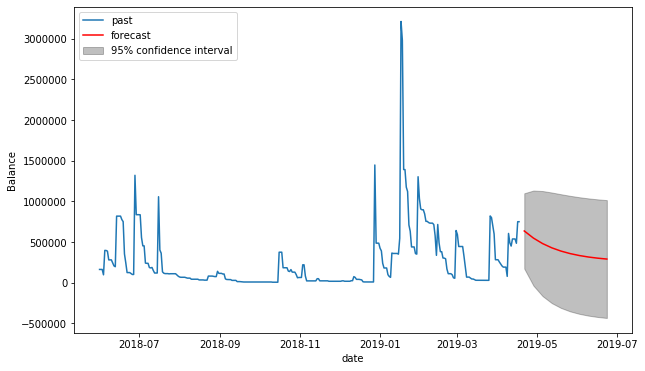

In [29]:
automodel = arimamodel(train["Balance"])
plotarima(10, train["Balance"], automodel)

C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\EESHITA\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


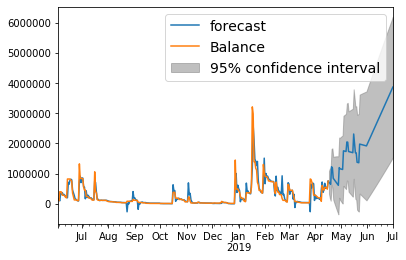

In [49]:
 #Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA

# Forecast interest rates using an AR(1) model
mod = ARIMA(df[:320][["Balance"]], order=(5,1,0),exog=df[:320][["funds rec","fund remittances","cred","deb"]])
res = mod.fit()


# Plot the original series and the forecasted series
fig=res.plot_predict(start=2,end='2019-07-01',exog=df[320:][["funds rec","fund remittances","cred","deb"]])
plt.legend(fontsize=14)
plt.show()

In [52]:
fig.savefig('my_plot.png')